In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/talks_info.csv')

In [3]:
df.sample(10)

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
4359,53235,714,TEDxBahiaBlanca,3.7K,https://www.ted.com/talks/juan_pablo_saez_gil_...,2020-01-15T19:13:05Z,2013-07-04,"[""1410"",""2027"",""30295"",""58017"",""64549"",""56535""]","[{""name"":""Juan Pablo Sáez Gil"",""occupation"":""A...",[],A Juan Pablo Sáez Gil le encantan los palídrom...,La magia de los palíndromos,"[{""id"":""13"",""name"":""design""},{""id"":""68"",""name""...",NaN,124210,gR9j9VUk6ys
2048,2132,872,TEDMED 2014,33K,https://www.ted.com/talks/ramanan_laxminarayan...,2014-11-10T16:17:01Z,2014-09-18,"[""1819"",""259"",""1421"",""2289"",""60819"",""54125""]","[{""name"":""Ramanan Laxminarayan"",""occupation"":""...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Antibiotic drugs save lives. But we simply use...,The coming crisis in antibiotics,"[{""id"":""6"",""name"":""global issues""},{""id"":""21"",...",The first patient to ever be treated with an ...,1105740,iWHq2m_Hwhw
3706,27692,687,TED@BCG Toronto,53K,https://www.ted.com/talks/nadjia_yousif_why_yo...,2018-12-12T15:54:30Z,2018-10-03,"[""2787"",""25601"",""25595"",""31240"",""28518"",""46585""]","[{""name"":""Nadjia Yousif"",""occupation"":""Technol...","[{""name"":""English"",""code"":""en""},{""name"":""Portu...",Imagine your company hires a new employee and ...,Why you should treat the tech you use at work ...,"[{""id"":""10"",""name"":""technology""},{""id"":""18"",""n...","So, imagine a company hires a new employee, be...",1775359,mnRlB3G9fDU
1468,1685,629,TED2013,126K,https://www.ted.com/talks/ron_finley_a_guerril...,2013-03-06T16:06:58Z,2013-02-28,"[""1306"",""1538"",""765"",""650"",""263"",""5072""]","[{""name"":""Ron Finley"",""occupation"":""Gardener""}]","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Ron Finley plants vegetable gardens in South C...,A guerrilla gardener in South Central LA,"[{""id"":""4"",""name"":""culture""},{""id"":""55"",""name""...",I live in South Central. This is South Central...,4231191,EzZzZ_qpZ4w
153,190,949,TED2007,25K,https://www.ted.com/talks/jan_chipchase_the_an...,2007-10-18T14:05:00Z,2007-03-03,"[""19"",""372"",""79"",""495"",""439"",""1518""]","[{""name"":""Jan Chipchase"",""occupation"":""User an...","[{""name"":""English"",""code"":""en""},{""name"":""Catal...",Nokia researcher Jan Chipchase's investigation...,The anthropology of mobile phones,"[{""id"":""4"",""name"":""culture""},{""id"":""6"",""name"":...","I live and work from Tokyo, Japan. And I speci...",834134,Qn2NR901NMY
4873,66458,323,Countdown,53K,https://www.ted.com/talks/sophie_howe_lessons_...,2020-10-10T19:55:31Z,2020-10-10,"[""66828"",""66733"",""66358"",""53"",""72243"",""46582""]","[{""name"":""Sophie Howe"",""occupation"":""Future Ge...","[{""name"":""English"",""code"":""en""},{""name"":""Chine...",Sophie Howe is the world's only future generat...,Lessons on leaving the world better than you f...,"[{""id"":""3"",""name"":""climate change""},{""id"":""5"",...","Wales is a small but progressive country, the ...",1770408,RJEJl6SKM4s
4575,63241,957,TEDxCambridgeUniversity,71K,https://www.ted.com/talks/amy_milton_can_we_ed...,2020-05-19T14:47:53Z,2019-03-16,"[""19831"",""19172"",""44372"",""24111"",""24257"",""1826""]","[{""name"":""Amy Milton"",""occupation"":""Behavioral...","[{""name"":""English"",""code"":""en""},{""name"":""Arabi...",Trauma and PTSD rewire your brain -- especiall...,Can we edit memories?,"[{""id"":""50"",""name"":""memory""},{""id"":""154"",""name...",Memory is such an everyday thing that we almos...,2375888,ZK7ih4V0erc
4157,48847,885,TED2019,10K,https://www.ted.com/talks/emmett_shear_what_st...,2019-09-16T14:56:07Z,2019-04-15,"[""23583"",""48272"",""13523"",""49735"",""799"",""936""]","[{""name"":""Emmett Shear"",""occupation"":""Entrepre...","[{""name"":""English"",""code"":""en""},{""name"":""Portu...","In a talk and demo, Twitch c

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 5631 non-null   int64 
 1   duration            5631 non-null   int64 
 2   event               5630 non-null   object
 3   likes               5631 non-null   object
 4   page_url            5631 non-null   object
 5   published_date      5631 non-null   object
 6   recorded_date       5629 non-null   object
 7   related_videos      5631 non-null   object
 8   speakers            5631 non-null   object
 9   subtitle_languages  5631 non-null   object
 10  summary             5631 non-null   object
 11  title               5631 non-null   object
 12  topics              5631 non-null   object
 13  transcript          4983 non-null   object
 14  views               5631 non-null   int64 
 15  youtube_video_code  5462 non-null   object
dtypes: int64(3), object(13)


In [5]:
df.describe()

,_id,duration,views
count,5631.000000,5631.000000,5.631000e+03
mean,25686.568460,707.691529,2.130394e+06
std,29649.007114,521.179373,3.679481e+06
min,1.000000,60.000000,5.870000e+02
25%,1642.500000,355.000000,6.781540e+05
50%,9807.000000,682.000000,1.392074e+06
75%,50009.500000,926.500000,2.182300e+06
max,95714.000000,20404.000000,7.338914e+07


In [6]:
df.event.nunique() #There are 630 unique events

630

In [7]:
df.summary

0       The founding mother of the blog revolution, Mo...
1       With the same humor and humanity he exuded in ...
2       New York Times columnist David Pogue takes aim...
3       Legendary scientist David Deutsch puts theoret...
4       Jehane Noujaim unveils her 2006 TED Prize wish...
                              ...                        
5626    In 2020, Mali produced over 71 tons of gold— a...
5627    Forget home economics and standardized tests, ...
5628    What if the commonly accepted narratives about...
5629    Your closet is likely full of all kinds of mat...
5630    Could DAOs, or "decentralized autonomous organ...
Name: summary, Length: 5631, dtype: object

In [8]:
df.columns

Index(['_id', 'duration', 'event', 'likes', 'page_url', 'published_date',
       'recorded_date', 'related_videos', 'speakers', 'subtitle_languages',
       'summary', 'title', 'topics', 'transcript', 'views',
       'youtube_video_code'],
      dtype='object')

In [9]:
related_videos = df.related_videos
df.drop('related_videos',axis=1,inplace=True)

In [10]:
df.likes.unique()

array(['17K', '110K', '60K', '80K', '14K', '364K', '42K', '128K', '32K',
       '2.2M', '144K', '41K', '460K', '126K', '510K', '37K', '101K',
       '145K', '33K', '56K', '43K', '34K', '139K', '39K', '127K', '18K',
       '603K', '89K', '54K', '20K', '221K', '278K', '35K', '76K', '70K',
       '29K', '486K', '28K', '30K', '16K', '91K', '19K', '27K', '67K',
       '242K', '50K', '85K', '13K', '69K', '99K', '216K', '25K', '140K',
       '52K', '132K', '26K', '75K', '65K', '21K', '133K', '61K', '88K',
       '196K', '15K', '78K', '24K', '44K', '58K', '195K', '181K', '66K',
       '23K', '117K', '36K', '22K', '102K', '10K', '164K', '79K', '46K',
       '47K', '108K', '57K', '51K', '55K', '130K', '59K', '45K', '307K',
       '162K', '491K', '157K', '299K', '93K', '73K', '71K', '11K', '7.1K',
       '851K', '210K', '12K', '68K', '403K', '62K', '9.5K', '100K',
       '107K', '8.3K', '31K', '49K', '82K', '40K', '468K', '149K', '129K',
       '194K', '239K', '3K', '38K', '90K', '203K', '120K', 

In [11]:
def convert_likes(likes):
    if 'K' in likes:
        return float(likes.replace('K', ''))  # Remove 'K' and convert to float
    elif 'M' in likes:
        return float(likes.replace('M', '')) * 1000  # Remove 'M', convert to float, and multiply by 1000
    else:
        return float(likes)/1000

df['likes'] = df['likes'].apply(convert_likes)

## Converting all the likes into thousands.

In [12]:
df.likes.unique()

array([1.70e+01, 1.10e+02, 6.00e+01, 8.00e+01, 1.40e+01, 3.64e+02,
       4.20e+01, 1.28e+02, 3.20e+01, 2.20e+03, 1.44e+02, 4.10e+01,
       4.60e+02, 1.26e+02, 5.10e+02, 3.70e+01, 1.01e+02, 1.45e+02,
       3.30e+01, 5.60e+01, 4.30e+01, 3.40e+01, 1.39e+02, 3.90e+01,
       1.27e+02, 1.80e+01, 6.03e+02, 8.90e+01, 5.40e+01, 2.00e+01,
       2.21e+02, 2.78e+02, 3.50e+01, 7.60e+01, 7.00e+01, 2.90e+01,
       4.86e+02, 2.80e+01, 3.00e+01, 1.60e+01, 9.10e+01, 1.90e+01,
       2.70e+01, 6.70e+01, 2.42e+02, 5.00e+01, 8.50e+01, 1.30e+01,
       6.90e+01, 9.90e+01, 2.16e+02, 2.50e+01, 1.40e+02, 5.20e+01,
       1.32e+02, 2.60e+01, 7.50e+01, 6.50e+01, 2.10e+01, 1.33e+02,
       6.10e+01, 8.80e+01, 1.96e+02, 1.50e+01, 7.80e+01, 2.40e+01,
       4.40e+01, 5.80e+01, 1.95e+02, 1.81e+02, 6.60e+01, 2.30e+01,
       1.17e+02, 3.60e+01, 2.20e+01, 1.02e+02, 1.00e+01, 1.64e+02,
       7.90e+01, 4.60e+01, 4.70e+01, 1.08e+02, 5.70e+01, 5.10e+01,
       5.50e+01, 1.30e+02, 5.90e+01, 4.50e+01, 3.07e+02, 1.62e

In [13]:
df.likes.max() # Highest likes of 2200K i.e. 2.2M for a video.

2200.0

In [14]:
df.likes.min() # Least likes of 17 for a video

0.017

In [15]:
df.speakers.unique()

array(['[{"name":"Mena Trott","occupation":"Blogger; cofounder, Six Apart"}]',
       '[{"name":"Al Gore","occupation":"Climate advocate"}]',
       '[{"name":"David Pogue","occupation":"Technology columnist"}]',
       ..., '[{"name":"David Wengrow","occupation":"Archaeologist"}]',
       '[{"name":"Dan Widmaier","occupation":"Biomaterials investigator"}]',
       '[{"name":"Scott Fitsimones","occupation":"Experimental urbanist"}]'],
      dtype=object)

In [16]:
df.speakers

0       [{"name":"Mena Trott","occupation":"Blogger; c...
1       [{"name":"Al Gore","occupation":"Climate advoc...
2       [{"name":"David Pogue","occupation":"Technolog...
3       [{"name":"David Deutsch","occupation":"Physici...
4       [{"name":"Jehane Noujaim","occupation":"Filmma...
                              ...                        
5626      [{"name":"Lyla Latif","occupation":"Educator"}]
5627    [{"name":"Trish Millines Dziko","occupation":"...
5628    [{"name":"David Wengrow","occupation":"Archaeo...
5629    [{"name":"Dan Widmaier","occupation":"Biomater...
5630    [{"name":"Scott Fitsimones","occupation":"Expe...
Name: speakers, Length: 5631, dtype: object

In [17]:
df['speakers'].dtype

dtype('O')

In [18]:
df['speakers'] = df['speakers'].astype(str)

In [19]:
df['occupation'] = df['speakers'].str.split(',', 1).apply(lambda x: ', '.join(x[1:]))
# Splitting the name and occupation from speakers column. Here, we got coccupation.
df['name'] = df['speakers'].str.split(',', 1).str[0]
# Here, we get names from speakers column.

<ipython-input-19-7f0f35343be6>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['occupation'] = df['speakers'].str.split(',', 1).apply(lambda x: ', '.join(x[1:]))
<ipython-input-19-7f0f35343be6>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['name'] = df['speakers'].str.split(',', 1).str[0]


In [20]:
df.occupation

0         "occupation":"Blogger; cofounder, Six Apart"}]
1                      "occupation":"Climate advocate"}]
2                  "occupation":"Technology columnist"}]
3                     "occupation":"Physicist, author"}]
4                             "occupation":"Filmmaker"}]
                              ...                       
5626                           "occupation":"Educator"}]
5627    "occupation":"Education visionary, strategist"}]
5628                      "occupation":"Archaeologist"}]
5629          "occupation":"Biomaterials investigator"}]
5630              "occupation":"Experimental urbanist"}]
Name: occupation, Length: 5631, dtype: object

In [21]:
df.name

0                 [{"name":"Mena Trott"
1                    [{"name":"Al Gore"
2                [{"name":"David Pogue"
3              [{"name":"David Deutsch"
4             [{"name":"Jehane Noujaim"
                     ...               
5626              [{"name":"Lyla Latif"
5627    [{"name":"Trish Millines Dziko"
5628           [{"name":"David Wengrow"
5629            [{"name":"Dan Widmaier"
5630        [{"name":"Scott Fitsimones"
Name: name, Length: 5631, dtype: object

In [22]:
df['name'] = df['name'].str.split(':', 1).str[1]
df['occupation'] = df['occupation'].str.split(':',1).str[1]
# Removing the 'name' and 'occupation' tag in each column

<ipython-input-22-f57d4d6a81b8>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['name'] = df['name'].str.split(':', 1).str[1]
<ipython-input-22-f57d4d6a81b8>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['occupation'] = df['occupation'].str.split(':',1).str[1]


In [23]:
df.name

0                 "Mena Trott"
1                    "Al Gore"
2                "David Pogue"
3              "David Deutsch"
4             "Jehane Noujaim"
                 ...          
5626              "Lyla Latif"
5627    "Trish Millines Dziko"
5628           "David Wengrow"
5629            "Dan Widmaier"
5630        "Scott Fitsimones"
Name: name, Length: 5631, dtype: object

In [24]:
df.occupation

0         "Blogger; cofounder, Six Apart"}]
1                      "Climate advocate"}]
2                  "Technology columnist"}]
3                     "Physicist, author"}]
4                             "Filmmaker"}]
                       ...                 
5626                           "Educator"}]
5627    "Education visionary, strategist"}]
5628                      "Archaeologist"}]
5629          "Biomaterials investigator"}]
5630              "Experimental urbanist"}]
Name: occupation, Length: 5631, dtype: object

In [25]:
df['name'] = df['name'].str.replace('"', '')
df['occupation'] = df['occupation'].str.replace('"', '')
# Removing punctuations to get raw names and occupation of each speaker

In [26]:
df.name

0                 Mena Trott
1                    Al Gore
2                David Pogue
3              David Deutsch
4             Jehane Noujaim
                ...         
5626              Lyla Latif
5627    Trish Millines Dziko
5628           David Wengrow
5629            Dan Widmaier
5630        Scott Fitsimones
Name: name, Length: 5631, dtype: object

In [27]:
df.occupation

0         Blogger; cofounder, Six Apart}]
1                      Climate advocate}]
2                  Technology columnist}]
3                     Physicist, author}]
4                             Filmmaker}]
                      ...                
5626                           Educator}]
5627    Education visionary, strategist}]
5628                      Archaeologist}]
5629          Biomaterials investigator}]
5630              Experimental urbanist}]
Name: occupation, Length: 5631, dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 5631 non-null   int64  
 1   duration            5631 non-null   int64  
 2   event               5630 non-null   object 
 3   likes               5631 non-null   float64
 4   page_url            5631 non-null   object 
 5   published_date      5631 non-null   object 
 6   recorded_date       5629 non-null   object 
 7   speakers            5631 non-null   object 
 8   subtitle_languages  5631 non-null   object 
 9   summary             5631 non-null   object 
 10  title               5631 non-null   object 
 11  topics              5631 non-null   object 
 12  transcript          4983 non-null   object 
 13  views               5631 non-null   int64  
 14  youtube_video_code  5462 non-null   object 
 15  occupation          5617 non-null   object 
 16  name  

In [29]:
#cols = ['speakers']
#df.drop(columns=cols,axis=True)
#df.info()
# As we already have name & occupation of speakers, we are dropping the speaker column.

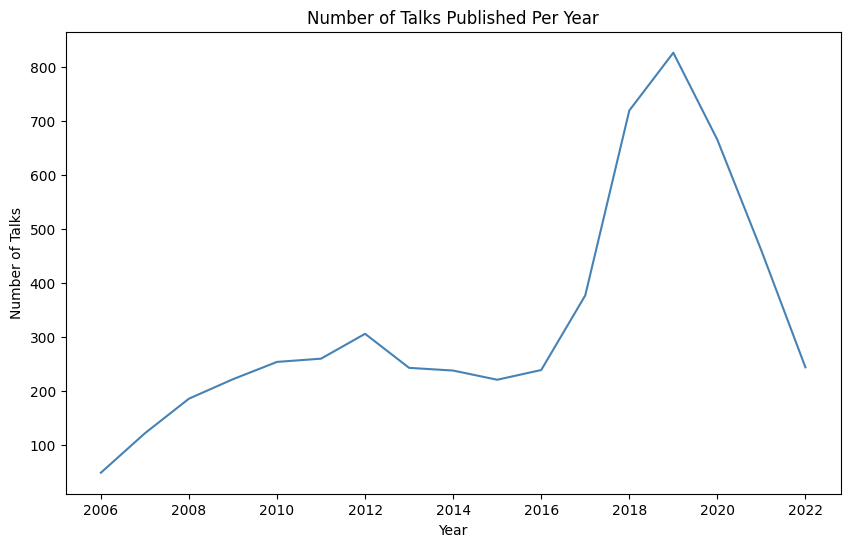

In [30]:
df['published_year'] = pd.to_datetime(df['published_date']).dt.year
talks_per_year = df['published_year'].value_counts().sort_index()

# Plot the number of talks per year
plt.figure(figsize=(10,6))
talks_per_year.plot(kind='line', color='steelblue')
plt.title('Number of Talks Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Talks')
plt.show()

In [31]:
df.topics.unique()

array(['[{"id":"4","name":"culture"},{"id":"13","name":"design"},{"id":"18","name":"business"},{"id":"37","name":"entertainment"},{"id":"42","name":"software"},{"id":"85","name":"storytelling"},{"id":"86","name":"communication"},{"id":"87","name":"community"}]',
       '[{"id":"3","name":"climate change"},{"id":"4","name":"culture"},{"id":"5","name":"environment"},{"id":"6","name":"global issues"},{"id":"8","name":"science"},{"id":"9","name":"sustainability"},{"id":"10","name":"technology"},{"id":"30","name":"transportation"},{"id":"5780","name":"renewable energy"}]',
       '[{"id":"10","name":"technology"},{"id":"36","name":"computers"},{"id":"37","name":"entertainment"},{"id":"39","name":"media"},{"id":"40","name":"music"},{"id":"41","name":"performance"},{"id":"42","name":"software"},{"id":"5791","name":"UX design"}]',
       ...,
       '[{"id":"4","name":"culture"},{"id":"81","name":"history"},{"id":"141","name":"anthropology"},{"id":"199","name":"humanity"},{"id":"221","name":"a

In [32]:
df['text'] = df['summary'].str.cat([df['title'], df['transcript']], sep=' ')
#Combined the title, summary and transcript column and generated a text column.

In [33]:
df.head()

,_id,duration,event,likes,page_url,published_date,recorded_date,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code,occupation,name,published_year,text
0,21,992,TED2006,17.0,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8,"Blogger; cofounder, Six Apart}]",Mena Trott,2006,"The founding mother of the blog revolution, Mo..."
1,1,957,TED2006,110.0,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27T00:11:00Z,2006-02-25,"[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA,Climate advocate}],Al Gore,2006,With the same humor and humanity he exuded in ...
2,7,1266,TED2006,60.0,https://www.ted.com/talks/david_pogue_simplici...,2006-06-27T00:11:00Z,2006-02-24,"[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{""id"":""10"",""name"":""technology""},{""id"":""36"",""n...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,NEjZt0y6OOw,Technology columnist}],David Pogue,2006,New York Times columnist David Pogue takes aim...
3,47,1126,TEDGlobal 2005,80.0,https://www.ted.com/talks/david_deutsch_chemic...,2006-09-12T00:11:00Z,2005-07-14,"[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",We've been told to go out on a limb and say so...,2694257,gQliI_WGaGk,"Physicist, author}]",David Deutsch,2006,Legendary scientist David Deutsch puts theoret...
4,55,1524,TED2006,14.0,https://www.ted.com/talks/jehane_noujaim_my_wi...,2006-07-25T00:11:00Z,2006-02-26,"[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,"[{""id"":""4"",""name"":""culture""},{""id"":""6"",""name"":...",I can't help but this wish: to think about whe...,489757,QCFSrb6B5nw,Filmmaker}],Jehane Noujaim,2006,Jehane Noujaim unveils her 2006 TED Prize wish...


In [34]:
cols = ['summary','transcript']
df.drop(columns=cols,axis=True)
df.info()
#Dropping summary and transcript. But, we might need title column in future.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 5631 non-null   int64  
 1   duration            5631 non-null   int64  
 2   event               5630 non-null   object 
 3   likes               5631 non-null   float64
 4   page_url            5631 non-null   object 
 5   published_date      5631 non-null   object 
 6   recorded_date       5629 non-null   object 
 7   speakers            5631 non-null   object 
 8   subtitle_languages  5631 non-null   object 
 9   summary             5631 non-null   object 
 10  title               5631 non-null   object 
 11  topics              5631 non-null   object 
 12  transcript          4983 non-null   object 
 13  views               5631 non-null   int64  
 14  youtube_video_code  5462 non-null   object 
 15  occupation          5617 non-null   object 
 16  name  

Text(0.5, 1.0, 'Word Cloud on summary, title and transcript combined')

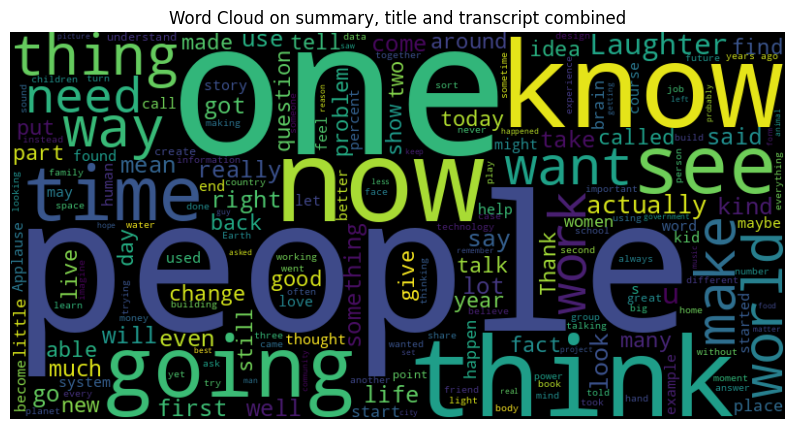

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['text'] = df['text'].astype(str)
text_combined = ' '.join(df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud on summary, title and transcript combined')

#This shows what the ted-talks are usually speaking about.

Text(0.5, 1.0, 'World Cloud on Title of Videos')

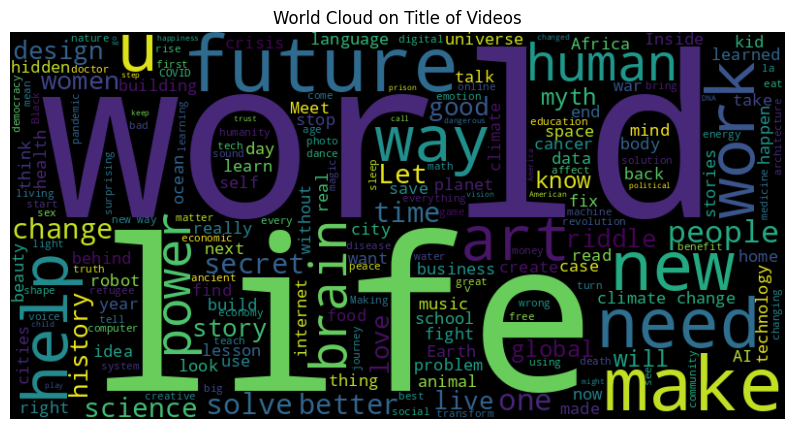

In [36]:
df['title'] = df['title'].astype(str)
text_combined = ' '.join(df['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('World Cloud on Title of Videos')

In [37]:
df.subtitle_languages

0       [{"name":"English","code":"en"},{"name":"Vietn...
1       [{"name":"Greek","code":"el"},{"name":"Gujarat...
2       [{"name":"Greek","code":"el"},{"name":"English...
3       [{"name":"Greek","code":"el"},{"name":"English...
4       [{"name":"English","code":"en"},{"name":"Vietn...
                              ...                        
5626    [{"name":"English","code":"en"},{"name":"Arabi...
5627    [{"name":"English","code":"en"},{"name":"Arabi...
5628    [{"name":"English","code":"en"},{"name":"Arabi...
5629                     [{"name":"English","code":"en"}]
5630                     [{"name":"English","code":"en"}]
Name: subtitle_languages, Length: 5631, dtype: object

In [38]:
df.subtitle_languages.count()

5631

In [39]:
import re
df['count'] = df['subtitle_languages'].apply(lambda x: len(re.findall(r'{[^}]+}', x)) if pd.notnull(x) else 0)

# Counting number of languages for each video

In [40]:
df['count']

0       21
1       43
2       27
3       29
4       20
        ..
5626     4
5627     2
5628     2
5629     1
5630     1
Name: count, Length: 5631, dtype: int64

In [41]:
df['subtitle_languages'][5630]

'[{"name":"English","code":"en"}]'

In [42]:
df['count'][5626]
df['subtitle_languages'][5626]

'[{"name":"English","code":"en"},{"name":"Arabic","code":"ar"},{"name":"Vietnamese","code":"vi"},{"name":"Hebrew","code":"he"}]'

In [43]:
df.columns

Index(['_id', 'duration', 'event', 'likes', 'page_url', 'published_date',
       'recorded_date', 'speakers', 'subtitle_languages', 'summary', 'title',
       'topics', 'transcript', 'views', 'youtube_video_code', 'occupation',
       'name', 'published_year', 'text', 'count'],
      dtype='object')

In [44]:
df.columns

Index(['_id', 'duration', 'event', 'likes', 'page_url', 'published_date',
       'recorded_date', 'speakers', 'subtitle_languages', 'summary', 'title',
       'topics', 'transcript', 'views', 'youtube_video_code', 'occupation',
       'name', 'published_year', 'text', 'count'],
      dtype='object')

In [45]:
df.rename(columns={'count': 'lang_count'}, inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 5631 non-null   int64  
 1   duration            5631 non-null   int64  
 2   event               5630 non-null   object 
 3   likes               5631 non-null   float64
 4   page_url            5631 non-null   object 
 5   published_date      5631 non-null   object 
 6   recorded_date       5629 non-null   object 
 7   speakers            5631 non-null   object 
 8   subtitle_languages  5631 non-null   object 
 9   summary             5631 non-null   object 
 10  title               5631 non-null   object 
 11  topics              5631 non-null   object 
 12  transcript          4983 non-null   object 
 13  views               5631 non-null   int64  
 14  youtube_video_code  5462 non-null   object 
 15  occupation          5617 non-null   object 
 16  name  

In [47]:
#df.drop(columns='speakers',inplace=True)

In [48]:
df.drop(columns='subtitle_languages',inplace=True)

In [49]:
df['topics'][0]

'[{"id":"4","name":"culture"},{"id":"13","name":"design"},{"id":"18","name":"business"},{"id":"37","name":"entertainment"},{"id":"42","name":"software"},{"id":"85","name":"storytelling"},{"id":"86","name":"communication"},{"id":"87","name":"community"}]'

In [50]:
df_top_views = df.nlargest(250, 'views')[['views', 'title','lang_count']]

# Print the DataFrame
print(df_top_views)

         views                                              title  lang_count
9     73389142                        Do schools kill creativity?          64
1308  65331931           Your body language may shape who you are          52
2482  62253756         Inside the mind of a master procrastinator          46
674   59273210                   How great leaders inspire action          48
834   58566923                         The power of vulnerability          52
...        ...                                                ...         ...
1916   7029009                 The psychology of your future self          44
2507   7020644  Your kids might live on Mars. Here's how they'...          26
203    7014369                     Free or cheap Wii Remote hacks          36
2026   6964984  Schrödinger's cat: A thought experiment in qua...          25
319    6953448                      Flow, the secret to happiness          34

[250 rows x 3 columns]


In [51]:
df_top_views['lang_count'].mean()

34.704

In [52]:
df_top_views['lang_count'].median()

34.0

Text(0.5, 1.0, 'World Cloud on Title of top 250 Videos with highest views')

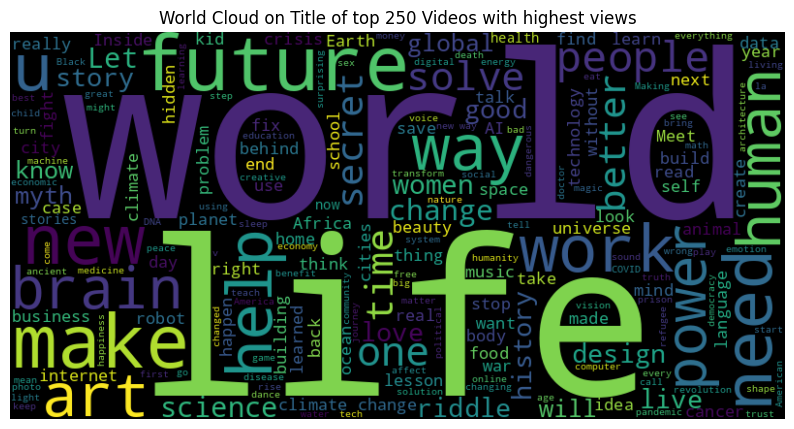

In [53]:
df_top_views['title'] = df_top_views['title'].astype(str)
text_combined = ' '.join(df['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('World Cloud on Title of top 250 Videos with highest views')

In [54]:
df_top_likes = df.nlargest(250, 'likes')[['likes', 'title','lang_count']]

# Print the DataFrame
print(df_top_likes)

       likes                                              title  lang_count
9     2200.0                        Do schools kill creativity?          64
1308  1900.0           Your body language may shape who you are          52
2482  1800.0         Inside the mind of a master procrastinator          46
674   1700.0                   How great leaders inspire action          48
834   1700.0                         The power of vulnerability          52
...      ...                                                ...         ...
203    210.0                     Free or cheap Wii Remote hacks          36
1916   210.0                 The psychology of your future self          44
2507   210.0  Your kids might live on Mars. Here's how they'...          26
319    208.0                      Flow, the secret to happiness          34
2026   208.0  Schrödinger's cat: A thought experiment in qua...          25

[250 rows x 3 columns]


In [55]:
df_top_likes['lang_count'].mean()
# Avg language subtitle for 250 videos is 35.

34.704

In [56]:
df_top_likes['lang_count'].median()

34.0

Text(0.5, 1.0, 'World Cloud on Title of top 250 Videos with highest likes')

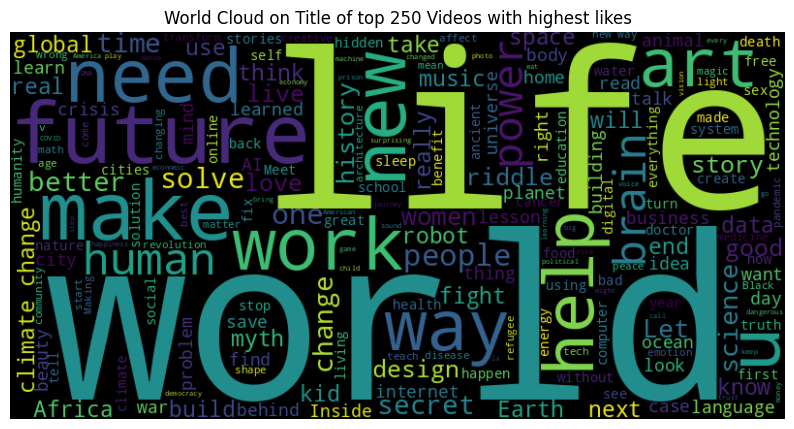

In [57]:
df_top_likes['likes'] = df_top_likes['title'].astype(str)
text_combined = ' '.join(df['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('World Cloud on Title of top 250 Videos with highest likes')

Word cloud of top-250 viewed and liked word clouds are almost similar. Which shows that more views might eventually give us more likes.

Top5 Viewed & Liked videos:
1. Do Schools Kill Creativity
2. Your body language may shape who you are
3. Inside the mind of master procrastinator
4. How great leaders inspire action
5. The power of vulnerability

In [58]:
df_top_occupations = df.nlargest(250, 'views')[['views', 'occupation']]

Text(0.5, 1.0, 'World Cloud on Occupation of Top 250 Videos with highest Views')

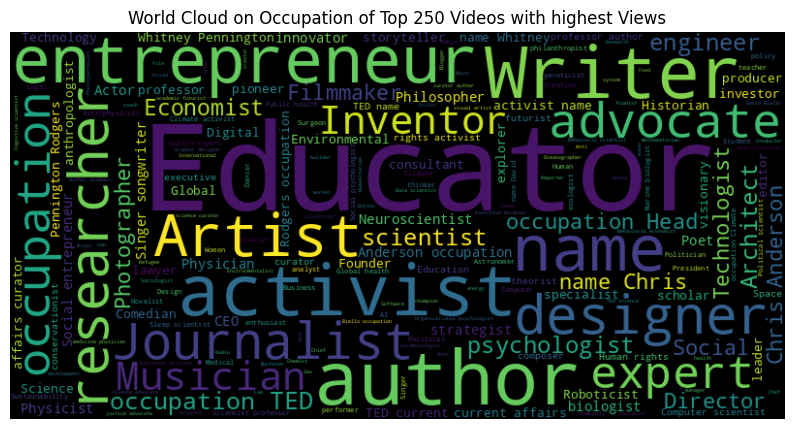

In [59]:
df['occupation']=df['occupation'].astype(str)

df_top_occupations['views'] = df_top_occupations['occupation'].astype(str)
text_combined = ' '.join(df['occupation'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400).generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('World Cloud on Occupation of Top 250 Videos with highest Views')

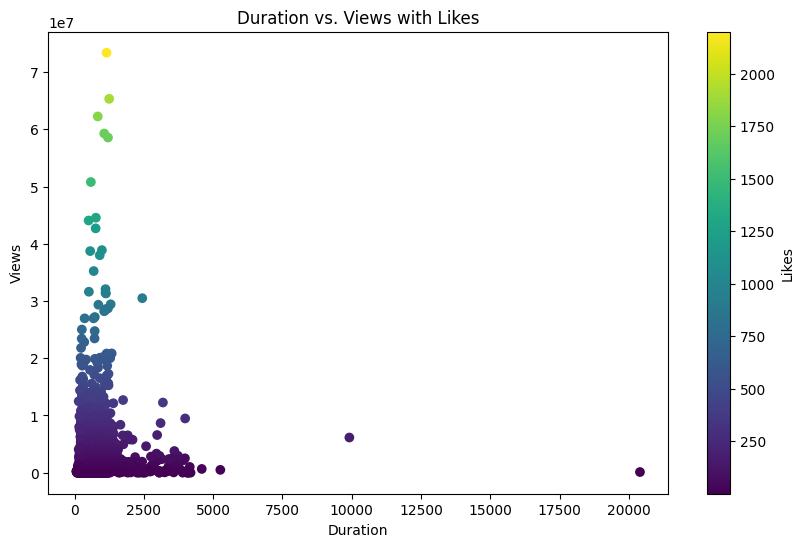

In [60]:
new_df = df[['duration', 'views', 'likes']].copy()

# Sorting the DataFrame by 'duration' in descending order
new_df = new_df.sort_values('duration', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(new_df['duration'], new_df['views'], c=new_df['likes'], cmap='viridis')
plt.colorbar(label='Likes')
plt.xlabel('Duration')
plt.ylabel('Views')
plt.title('Duration vs. Views with Likes')
plt.show()

In [61]:
new_df = df[['duration', 'views']].copy()

# Sorting the DataFrame by 'duration' in descending order
new_df = new_df.sort_values('duration', ascending=False)

# Printing the sorted DataFrame
print(new_df)

      duration    views
4822     20404   122390
5296      9915  6151386
637       5257   500746
585       4587   660270
4834      4182     9476
...        ...      ...
4072        78   240153
4806        76   277695
4807        73   247417
4813        70   230959
4147        60   249226

[5631 rows x 2 columns]


In [62]:
new_df = df[['duration', 'views', 'likes']].copy()

# Calculating the IQR
Q1 = new_df['duration'].quantile(0.25)
Q3 = new_df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
new_df = new_df[(new_df['duration'] >= lower_bound) & (new_df['duration'] <= upper_bound)]

# Sorting the DataFrame by 'duration' in descending order
new_df = new_df.sort_values('duration', ascending=False)

# Displaying the new DataFrame
print(new_df)

      duration    views  likes
4698      1781   223186    6.6
168       1778  1971231   59.0
171       1768  1989230   59.0
2827      1758  4959609  148.0
358       1752   696751   20.0
...        ...      ...    ...
4021        78   190051    5.7
4806        76   277695    8.3
4807        73   247417    7.4
4813        70   230959    6.9
4147        60   249226    7.4

[5542 rows x 3 columns]


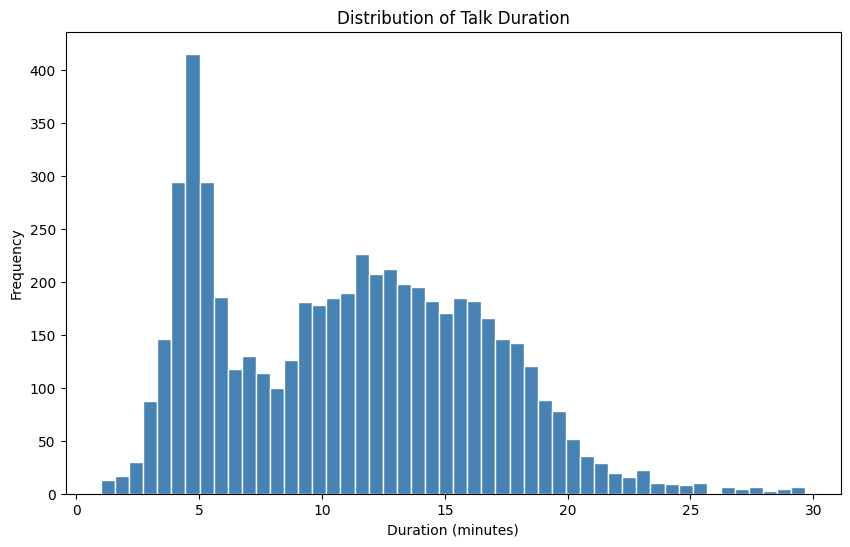

In [63]:
# Plot the distribution of the 'duration' column
plt.figure(figsize=(10,6))
plt.hist(new_df['duration']/60, bins=50, color='steelblue', edgecolor='white')
plt.title('Distribution of Talk Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

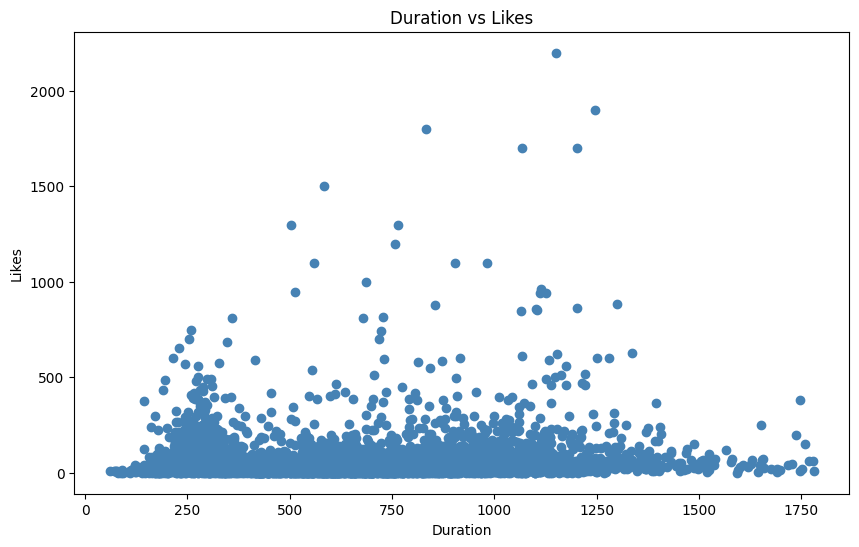

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['duration'], new_df['likes'], color='steelblue')
plt.title('Duration vs Likes')
plt.xlabel('Duration')
plt.ylabel('Likes')
plt.show()
# Plot between duration and likes

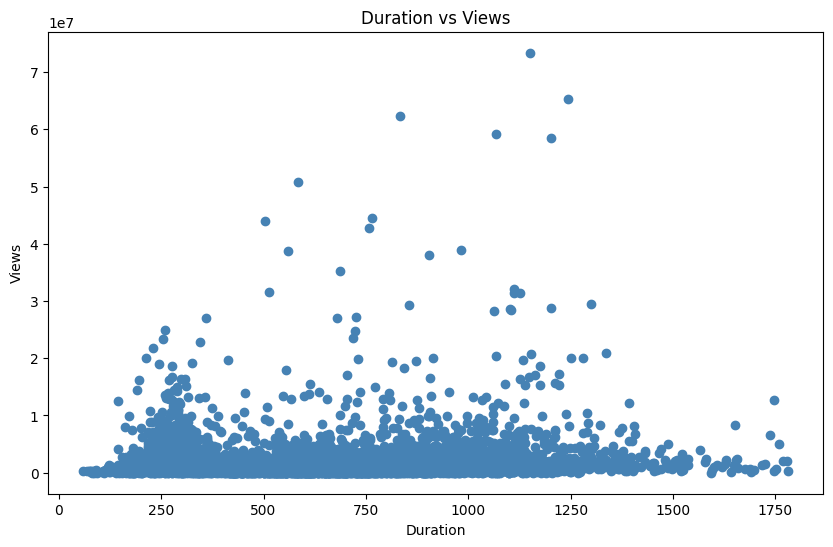

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['duration'], new_df['views'], color='steelblue')
plt.title('Duration vs Views')
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()
# Plot between duration and views

In [66]:
from ast import literal_eval

# Function to extract topics
def extract_topics_v2(topics_str):
    topics_list = literal_eval(topics_str)
    return [topic['name'] for topic in topics_list]

# Applying the function to extract topics
topics_series_v2 = df['topics'].apply(extract_topics_v2)

# Flattening the list of topics and creating a Pandas Series
all_topics_v2 = pd.Series([topic for sublist in topics_series_v2 for topic in sublist])

# Getting the top 10 most common topics
top_10_topics_v2 = all_topics_v2.value_counts().nlargest(10)
top_10_topics_v2

science          1267
technology       1231
TED-Ed            878
culture           828
animation         805
education         772
society           710
TEDx              700
social change     675
global issues     670
dtype: int64

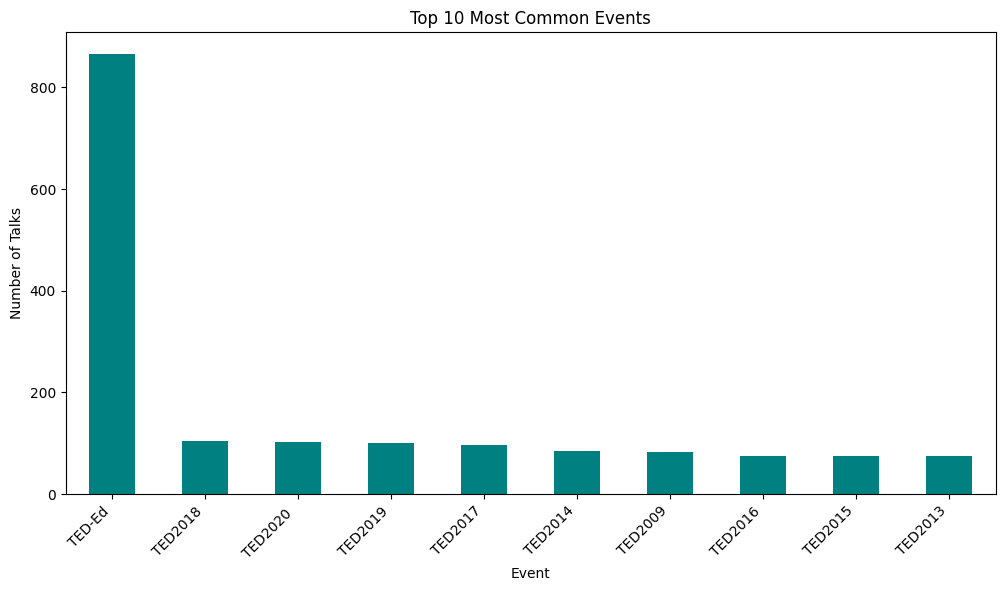

In [67]:
# Getting the top 10 most common events
top_10_events = df['event'].value_counts().nlargest(10)

# Plotting the top 10 most common events
plt.figure(figsize=(12, 6))
top_10_events.plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Events')
plt.xlabel('Event')
plt.ylabel('Number of Talks')
plt.xticks(rotation=45, ha='right')
plt.show()

In [68]:
# Function to extract speaker occupations
def extract_occupations(speakers_str):
    speakers_list = literal_eval(speakers_str)
    return [speaker['occupation'] for speaker in speakers_list if 'occupation' in speaker]

# Applying the function to extract occupations
occupations_series = df['speakers'].apply(extract_occupations)

# Flattening the list of occupations and creating a Pandas Series
all_occupations = pd.Series([occupation for sublist in occupations_series for occupation in sublist])

# Getting the top 10 most common occupations
top_10_occupations = all_occupations.value_counts().nlargest(10)
top_10_occupations

Educator                       925
                               117
Artist                          60
Writer                          58
Head of TED                     58
Journalist                      54
Entrepreneur                    53
Designer                        39
TED current affairs curator     38
Architect                       36
dtype: int64

In [69]:
# Creating a DataFrame with occupations, views, and likes
occupations_df = pd.DataFrame({
    'occupations': occupations_series,
    'views': df['views'],
    'likes': df['likes']
})

# Expanding the DataFrame to have one row per occupation
occupations_df = occupations_df.explode('occupations')

# Filtering to include only the top 10 occupations
occupations_df_top_10 = occupations_df[occupations_df['occupations'].isin(top_10_occupations.index)]

# Calculating the mean views and likes for the top 10 occupations
occupation_stats = occupations_df_top_10.groupby('occupations').agg({
    'views': 'mean',
    'likes': 'mean'
}).sort_values(by='views', ascending=False)

occupation_stats

,views,likes
occupations,,
Writer,4.058903e+06,120.102586
Journalist,2.690194e+06,80.265259
Educator,2.635061e+06,78.581448
Entrepreneur,2.171080e+06,64.672755
Head of TED,2.029460e+06,60.441862
Designer,1.663608e+06,49.461077
Architect,1.518205e+06,45.077778
TED current affairs curator,1.379780e+06,41.011289
Artist,1.092545e+06,32.324183


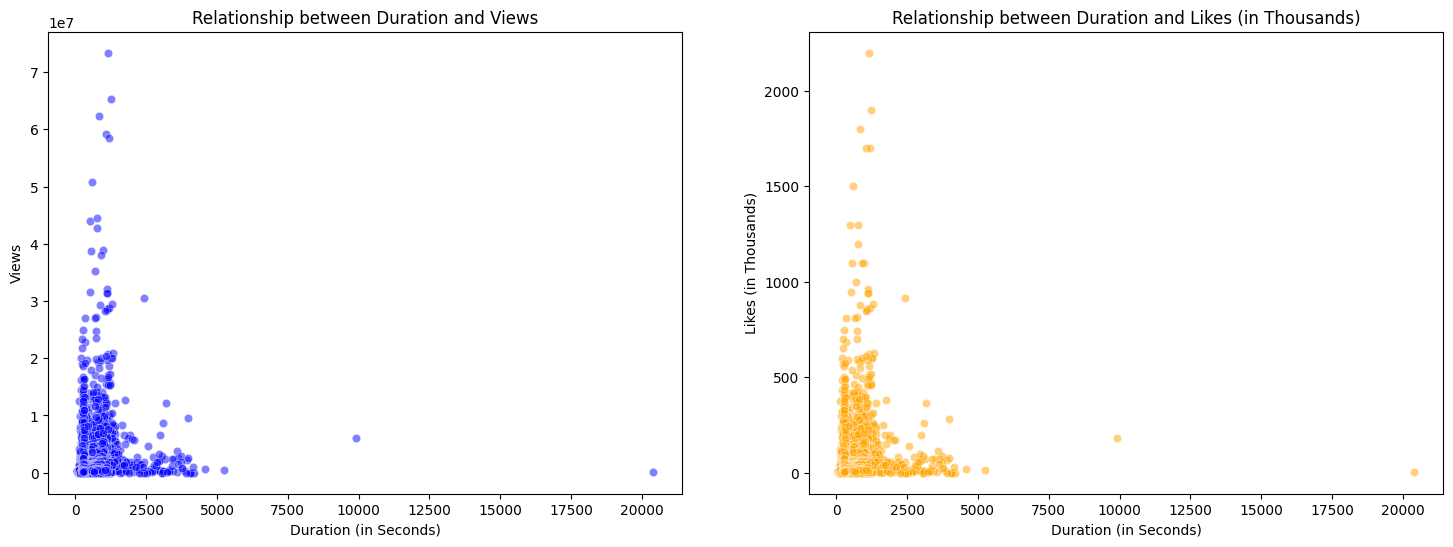

In [70]:
# Setting up the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the relationship between duration and views
sns.scatterplot(x='duration', y='views', data=df, ax=axes[0], color='blue', alpha=0.5)
axes[0].set_title('Relationship between Duration and Views')
axes[0].set_xlabel('Duration (in Seconds)')
axes[0].set_ylabel('Views')

# Plotting the relationship between duration and likes
sns.scatterplot(x='duration', y='likes', data=df, ax=axes[1], color='orange', alpha=0.5)
axes[1].set_title('Relationship between Duration and Likes (in Thousands)')
axes[1].set_xlabel('Duration (in Seconds)')
axes[1].set_ylabel('Likes (in Thousands)')

plt.show()